In [1]:
import pandas as pd

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from PIL import Image

In [2]:
df = pd.read_csv('datasets/emails.csv')
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [3]:
df.shape

(5172, 3002)

<AxesSubplot:xlabel='Prediction'>

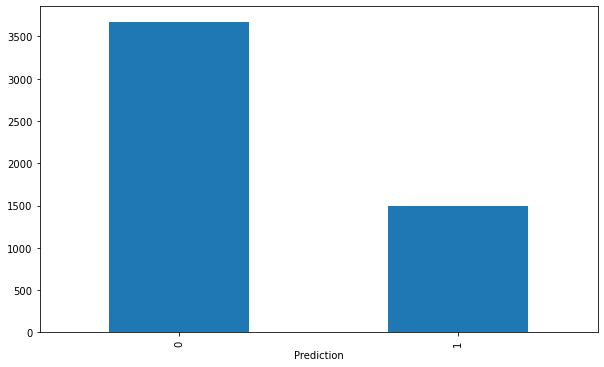

In [4]:
df.groupby(['Prediction']).size().plot(kind='bar',figsize=(10, 6))

In [5]:
from sklearn.model_selection import train_test_split

X = df.drop(['Email No.', 'Prediction'], axis=1)
Y = df['Prediction']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [6]:
x_train.shape, y_train.shape

((4137, 3000), (4137,))

In [7]:
x_test.shape, y_test.shape

((1035, 3000), (1035,))

In [8]:
from sklearn.svm import LinearSVC
model = LinearSVC(C=1.0, max_iter=1000, tol=1e-3, dual=False).fit(x_train, y_train)

In [9]:
y_pred = model.predict(x_test)

In [10]:
pred_results = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})

In [11]:
pred_results.head()

,y_test,y_pred
4652,1,1
746,1,1
2748,0,0
4653,0,0
3737,0,0


In [12]:
df_crosstab = pd.crosstab(pred_results.y_pred, pred_results.y_test)
df_crosstab

y_test,0,1
y_pred,,
0,732,9
1,13,281


In [13]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [14]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Acurácia : ", accuracy)
print("Precisão : ", precision)
print("Recall : ", recall)

Acurácia :  0.978743961352657
Precisão :  0.95578231292517
Recall :  0.9689655172413794


In [15]:
decision_function = model.decision_function(X)
decision_function

array([ -0.39331548,  -9.55965046,  -1.6208526 , ...,   0.35175578,
         2.60576749, -12.72389029])